<h1><center>Analyzing the Adult Census Income Dataset: Insights and Techniques for Statistical Analysis.</center></h1>

### <center>Spring 2023</center>
### <center>MA 541: Statistical Methods</center>
### <center>Bhanoday Sakamuri</center>
### <center>Project Supervisor: Dr. Hadi Safari Katesari</center>

## <center>Abstract</center>

This project analyzes the Adult Census Income dataset using various statistical techniques such as hypothesis testing, confidence intervals, ANOVA, categorical data analysis, comparing samples, nonparametric methods, logistic regression, resampling methods, bootstrap, model selection, LASSO, ridge regression, gam model and polynomial features. Results provide insights into the factors influencing income levels and the best techniques for analyzing such data. Techniques include testing hypotheses, calculating confidence intervals, comparing sample means, predicting events, selecting models, and identifying key variables. Overall, this study offers valuable information on income and statistical analysis methods.

## <center>Chapter 1: Introduction</center>

The Adult Census Income dataset is a real-world dataset that has become a benchmark for evaluating machine learning algorithms for predicting income levels. The dataset contains various demographic and socioeconomic variables such as age, education, occupation, workclass, and marital status. The purpose of this project is to explore the dataset, analyze the relationships between variables, and build a predictive model that can accurately classify individuals into high or low income categories. The insights gained from this project can be used to identify the most significant factors that contribute to income inequality and to develop policies and programs to address this issue. The project will use a variety of statistical tests such as hypothesis testing, confidence intervals, ANOVA, categorical data analysis, and regression analysis to analyze the dataset and identify the relationships between variables.

In order to build an accurate predictive model, the project will employ machine learning techniques such as logistic regression, LASSO, and ridge regression. These techniques are widely used in the field of data science and can effectively handle high-dimensional datasets such as the Adult Census Income dataset. The significance of this project lies in its potential to provide insights into income inequality and to help policymakers develop effective strategies to address this issue. Income inequality is a pressing issue in many countries, and understanding the factors that contribute to it is crucial for developing policies to reduce it.

Furthermore, the project showcases the power of data-driven decision-making and the importance of utilizing statistical and machine learning techniques to extract insights from complex datasets. This project serves as an example of how data science can be used to address real-world problems and has implications for businesses, governments, and other organizations seeking to leverage data analytics for growth and innovation. Overall, this project aims to demonstrate the value of statistical analysis and predictive modeling in understanding complex datasets and providing insights into important societal issues such as income inequality. Through its use of a variety of statistical and machine learning techniques, this project will provide a comprehensive analysis of the Adult Census Income dataset and identify the most significant factors that contribute to income inequality.

## <center>Chapter 2: Data Description</center>

#### Link: https://www.kaggle.com/datasets/uciml/adult-census-income

The Adult Census Income dataset contains information about individuals from the 1994 United States Census. The dataset consists of 48,842 instances with 14 attributes, including the target variable "income," which indicates whether an individual makes over 50k dollars per year or not. The dataset contains various demographic and socio-economic features such as age, education, workclass, occupation, marital status, race, gender, and native country. 

Here's a brief explanation of each feature:

Age: continuous variable representing the age of the individual.

Workclass: categorical variable indicating the type of employment, including private, self-employment, government, and others.

Fnlwgt: continuous variable, represents the number of individuals the census believes the entry represents. This feature is not considered useful and is typically ignored.

Education: categorical variable indicating the level of education achieved by the individual, ranging from 1st grade to a doctorate degree.

Education num: continuous variable representing the number of years of education completed by the individual.

Marital status: categorical variable indicating the marital status of the individual, such as married, divorced, separated, or never married.

Occupation: categorical variable indicating the type of occupation, such as professional, technical, managerial, clerical, sales, etc.

Relationship: categorical variable indicating the relationship status, such as husband, wife, unmarried, etc.

Race: categorical variable indicating the individual's race, including White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other.

Sex: categorical variable indicating the individual's gender, either Male or Female.

Capital gain: continuous variable indicating the individual's capital gains.

Capital loss: continuous variable indicating the individual's capital losses.

Hours per week: continuous variable indicating the number of hours worked per week.

Native country: categorical variable indicating the individual's native country, including the United States, Mexico, Philippines, and others.

###                                                          Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import zscore
from scipy.stats import norm
import statsmodels.stats.multicomp as mc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from pygam import LogisticGAM



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into a pandas DataFrame

In [2]:
df = pd.read_csv('adult.csv')
print("Dataset imported successfully")
#View summary of dataframe
df.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Check shape of the dataset

In [3]:
df_shape = df.shape
print(df_shape)

(32561, 15)


### Print column names

In [4]:
df_columns = df.columns
print(df_columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [5]:
# Print first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In the dataset, the columns "workclass," "occupation," and "native.country" have some values of "?".
This can be handled by filling in the missing values for the '?' fields with the mode of the appropriate columns.

### Handling missing values

In [6]:
df.replace('?', np.nan, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = df['native.country'].mode()[0]
df['native.country'].fillna(mode_native_country, inplace=True)

In [7]:
# Check for missing values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

In [9]:
# Drop unnecessary columns
df.drop(['fnlwgt'], axis=1, inplace=True)

### Calculating correlation matrix

In [10]:
corrmat = df.corr()
print(corrmat)

                     age  education.num  capital.gain  capital.loss  \
age             1.000000       0.036527      0.077674      0.057775   
education.num   0.036527       1.000000      0.122630      0.079923   
capital.gain    0.077674       0.122630      1.000000     -0.031615   
capital.loss    0.057775       0.079923     -0.031615      1.000000   
hours.per.week  0.068756       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


Text(0.5, 1.0, 'Correlation Heatmap')

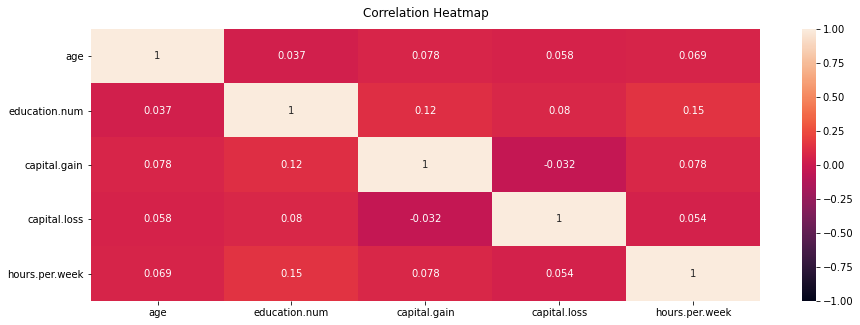

In [11]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


 ### Exploratory Data Analysis (EDA)

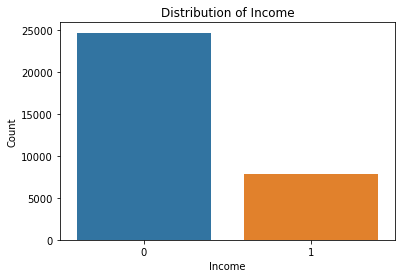

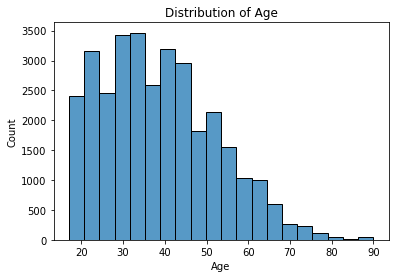

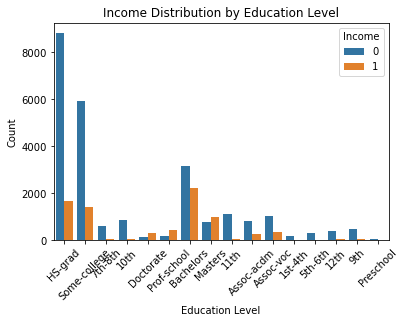

In [40]:
# Visualize the distribution of income
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()


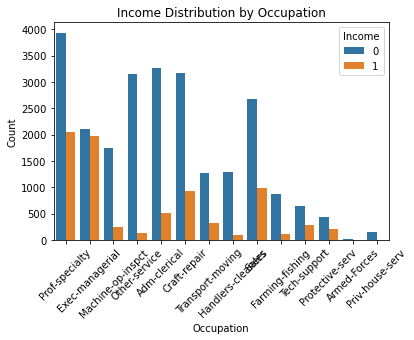

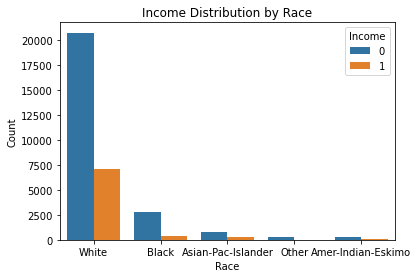

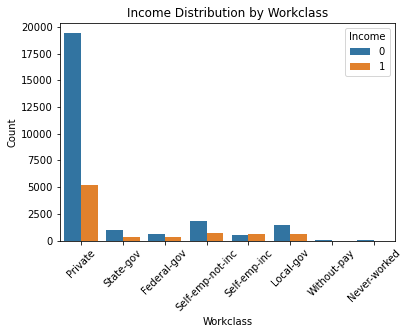

In [41]:
# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=df)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()



## <center>Chapter 3: Methodology </center>

##### Comparing Two Samples: 
Comparing two samples in statistical methods involves analyzing and testing for differences between two sets of data to determine if they come from the same population or different populations. It is a common technique used in hypothesis testing, experimental design, and data analysis. There are different techniques to use depending on the data and research question. Some commonly used methods include independent samples t-test, paired samples t-test, Mann-Whitney U test, Wilcoxon signed-rank test, chi-square test, and Fisher's exact test. It is important to choose the appropriate test and ensure that its assumptions are met.

##### The Analysis of Variance:
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are any significant differences between the means of three or more groups. ]
The ANOVA test produces an F-statistic and a corresponding p-value, which is used to determine whether the differences between the group means are statistically significant or simply due to chance. If the p-value is less than the significance level (typically 0.05), it is concluded that there are significant differences between the group means.

##### The Analysis of Categorical Data:

The analysis of categorical data involves techniques to analyze data that can be classified into distinct categories or groups, such as gender or educational level. Common techniques include frequency tables, bar charts, and pie charts, as well as statistical tests like the chi-square test and Fisher's exact test. Contingency tables and logistic regression are also commonly used to analyze categorical data. The choice of technique depends on the research question and the nature of the data.


##### Linear Regression:
Linear regression is a statistical analysis technique that is used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find a linear equation that best predicts the value of the dependent variable based on the values of the independent variables.

In a simple linear regression, there is only one independent variable, while in multiple linear regression, there are multiple independent variables. The equation for a simple linear regression model is given by:

Y = β0 + β1X + ε

where Y is the dependent variable, X is the independent variable, β0 is the intercept, β1 is the slope, and ε is the error term.

##### Resampling Methods:
Resampling refers to the process of repeatedly drawing samples from a given dataset and using these samples to estimate the properties of the population from which the original data was collected.
Some common resampling techniques include:

Cross-validation: A technique for assessing the performance of a predictive model by dividing the data into training and testing subsets and iteratively re-estimating the model on different subsets.

Bootstrapping: A method for estimating the variability of a statistic by repeatedly sampling from the original dataset with replacement.

##### Linear Model Selection and Regularization:
Linear Model Selection and Regularization are statistical techniques used to improve the accuracy and interpretability of linear regression models. Model selection involves choosing the most important predictors to include in the model, while regularization involves adding constraints to the model to prevent overfitting. There are various methods for linear model selection such as forward selection, backward elimination, and stepwise selection. 
Forward selection starts with an empty model and adds features one by one based on their impact on the performance metric, while backward selection starts with a full model and eliminates the least important features iteratively.
The most common regularization techniques are Lasso, Ridge, and Elastic Net regression.

##### Moving Beyond Linearity:
Moving Beyond Linearity refers to a set of statistical methods that can model nonlinear relationships between variables, rather than assuming a linear relationship as in traditional linear regression. These methods are used when the relationship between the dependent variable and the independent variables is not well captured by a straight line or a linear function. Moving Beyond Linearity methods include polynomial regression, splines, and generalized additive models (GAMs), among others. 

## <center>Chapter 4: Analysis and Results</center> 

## <center>4.1 Comparing Two Samples</center>

In [13]:
print(df['workclass'].unique())


['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


Consider two samples with Sample1 as Local-government and sample2 as State-government capital loss in USD whose race is White.

In [14]:
# Select two random samples from the dataset
sample1 = df[(df['workclass'] == 'Local-gov') & (df['race'] == 'White')]['capital.loss']
sample2 = df[(df['workclass'] == 'State-gov') & (df['race'] == 'White')]['capital.loss']
print("Sample 1 size:", len(sample1))
print("Sample 2 size:", len(sample2))
print(sample1.mean())
print(sample2.mean())


Sample 1 size: 1720
Sample 2 size: 1062
118.38662790697674
92.32580037664783


Since number of samples>30 here we can use Z test

### Performing Z-test

In [15]:
z_test, p_value = ztest(sample1, sample2, value=0)
print("Z-test =", z_test)
print('P-value =', p_value)
print('H0: The means of the two groups are equal')
print('H1: The means of the two groups are not equal')
if p_value > 0.05:
    print('Fail to reject H0. The means of the two groups are equal.')
else:
    print('Reject H0. The means of the two groups are not equal.')

Z-test = 1.5149601114639213
P-value = 0.12978250593355953
H0: The means of the two groups are equal
H1: The means of the two groups are not equal
Fail to reject H0. The means of the two groups are equal.


## <center>4.2 The Analysis of Variance</center>

In [16]:
white = df[df['race'] == 'White']['capital.loss']
black = df[df['race'] == 'Black']['capital.loss']
asian_pac = df[df['race'] == 'Asian-Pac-Islander']['capital.loss']
amer_indian = df[df['race'] == 'Amer-Indian-Eskimo']['capital.loss']
other = df[df['race'] == 'Other']['capital.loss']
f_test, p_value = stats.f_oneway(white, black, asian_pac, amer_indian, other)


In [17]:
print('H0: The means of the Race groups are equal')
print('H1: The means of the Race groups are not equal')
print('\nF-statistic =', f_test, ', p-value =', p_value)
if p_value > 0.05:
     print('Fail to reject H0. The means of the Race groups are equal.')
else:
     print('Reject H0. The means of the Race-levels are not equal.')

H0: The means of the Race groups are equal
H1: The means of the Race groups are not equal

F-statistic = 5.810007129466273 , p-value = 0.0001137802258227957
Reject H0. The means of the Race-levels are not equal.


#### We can see that The means of the Race levels are not equal. So, we perform Tukey's test to identify which pairs of group means are significantly different from each other.

### Performing Tukey's test

In [18]:
tukey_result = mc.MultiComparison(df['capital.loss'], df['race']).tukeyhsd()

# Print Tukey's test results
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------------------
Amer-Indian-Eskimo Asian-Pac-Islander  63.0455 0.1097   -7.9845 134.0755  False
Amer-Indian-Eskimo              Black  26.2082 0.7844  -39.1335    91.55  False
Amer-Indian-Eskimo              Other  26.8933    0.9  -64.4254  118.212  False
Amer-Indian-Eskimo              White  56.6293 0.0986   -6.0317 119.2903  False
Asian-Pac-Islander              Black -36.8372 0.0795  -76.1925    2.518  False
Asian-Pac-Islander              Other -36.1522 0.6587 -111.1082  38.8038  False
Asian-Pac-Islander              White  -6.4162    0.9  -41.1393  28.3069  False
             Black              Other    0.685    0.9  -68.9043  70.2744  False
             Black              White  30.4211  0.001    9.6853  51.1569   True
             Other              White   

#### The results of Tukey's test indicate significant differences in means between Amer-Indian-Eskimo and White groups, Asian-Pac-Islander and Black groups, and Black and White groups, but no significant differences in means between the other group pairs.

## <center>4.3 The Analysis of Categorical data</center> 

In [19]:
# create a contingency table of race and sex
cont_table = pd.crosstab(df['race'], df['sex'])
print(cont_table)

sex                 Female   Male
race                             
Amer-Indian-Eskimo     119    192
Asian-Pac-Islander     346    693
Black                 1555   1569
Other                  109    162
White                 8642  19174


### Performing chi-square test

In [20]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cont_table)

# print results
print('Chi-square statistic =', chi2_stat)
print('Degrees of freedom =', dof)
print('P-value =', p_val)
print('Expected Frequenices: \n', ex)
# interpret results
alpha = 0.05
if p_val < alpha:
    print('Reject the null hypothesis. There is a significant association between race and sex.')
else:
    print('Fail to reject the null hypothesis. There is no significant association between race and sex.')


Chi-square statistic = 454.2671089131088
Degrees of freedom = 4
P-value = 5.192061302760456e-97
Expected Frequenices: 
 [[  102.87709223   208.12290777]
 [  343.69549461   695.30450539]
 [ 1033.40204539  2090.59795461]
 [   89.64531188   181.35468812]
 [ 9201.3800559  18614.6199441 ]]
Reject the null hypothesis. There is a significant association between race and sex.


#### The output of the chi-square test suggests that there is a significant association between race and sex in the adult census income dataset. 

##  <center>4.4 Linear Regression</center>

### Converting the target variable 'income' to binary 0/1

In [21]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Split the dataset into training and testing sets

In [22]:
X = df.drop(['income'], axis=1)

y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Converting categorical variables to numerical variables using LabelEncoder()

In [23]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

### Scale the data using StandardScaler()

In [24]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [25]:
X_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Linear Regression

In [26]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2sq = r2_score(y_test,y_pred)

In [27]:
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2sq)

Mean Squared Error:  0.13562293520217433
R2 Score:  0.2595645393426095


The R2 score is 0.2596, which is a quite low value, as can be seen. This means that the model is not able to explain a large portion of the variance in the dependent variable. As the target varibale is Categorocal, the logistic regression model performs better than the linear regression model.

### Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8215


In [30]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8214760978605794
Precision: 0.7125086385625432
Recall: 0.437049597286986
F1 Score: 0.5417761429322123
ROC AUC Score: 0.6904546232048966


The output Logistic Regression indicates that the logistic regression model achieved an accuracy of 0.8215 (or 82.15%) on the test set when using all the available features. This means that the model correctly predicted the output label for 82.15% of the instances in the test set. Therefore the Logistic Regression model produces better results compared to the Linear Regression

## <center>4.5 Resampling Methods</center>

### Cross Validation

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model
logreg = LogisticRegression()

# Perform 10-fold cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print(f"Cross-validation scores: {scores}")
# Print the average accuracy score across all folds
print("Average Accuracy:", scores.mean())


Cross-validation scores: [0.82280702 0.83903509 0.82316806 0.82492321 0.83194384 0.82887231
 0.81790259 0.82316806 0.82799473 0.82229048]
Average Accuracy: 0.826210537862867


### Bootsrap

In [53]:
# define a function to generate a bootstrap sample
def generate_bootstrap_sample(data):
    return np.random.choice(data, size=len(data))

# define a function to calculate bootstrap accuracy
def bootstrap_accuracy(data, model, n_samples):
    accuracies = []
    for i in range(n_samples):
        # generate a bootstrap sample
        
        # fit a logistic regression model on the bootstrap sample
        model_bs = LogisticRegression(random_state=42)
        model_bs.fit(X_train, y_train)
        # evaluate the model's performance on the testing set
        y_pred = model_bs.predict(X_test)
        accuracy_bs = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy_bs)
    # calculate the mean accuracy and 95% confidence interval
    mean_accuracy = np.mean(accuracies)
    ci = np.percentile(accuracies, [2.5, 97.5])
    return mean_accuracy, ci

# calculate the bootstrap accuracy
mean_accuracy, ci = bootstrap_accuracy(df, logreg, 100)
print("Bootstrap Mean Accuracy: ",mean_accuracy)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(ci[0], ci[1]))


Bootstrap Mean Accuracy:  0.8214760978605795
95% Confidence Interval: [0.82, 0.82]


## <center>4.6 Linear Model Selection and Regularization</center> 

### Forward Stepwise Selection

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Scale the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a logistic regression model
logreg = LogisticRegression()

# Use sequential feature selector to perform forward stepwise selection
sfs = SFS(logreg, 
          k_features=6, 
          forward=True, 
          floating=False, 
          verbose=2, 
          scoring='accuracy',
          cv=5)

# Train the sequential feature selector on the scaled training data
sfs.fit(X_train_scaled, y_train)

# Print the selected feature indices and names
print("Selected feature indices:", sfs.k_feature_idx_)
print("Selected feature names:", X.columns[list(sfs.k_feature_idx_)])

# Train a logistic regression model on the selected features
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_scaled[:, list(sfs.k_feature_idx_)], y_train)

# Predict on the testing data using the selected features and evaluate the model
y_pred = logreg_selected.predict(X_test_scaled[:, list(sfs.k_feature_idx_)])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score on the testing data: {accuracy*100:.2f}%")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.7s finished

[2023-05-01 13:29:58] Features: 1/6 -- score: 0.7995785162234968[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.1s finished

[2023-05-01 13:29:59] Features: 2/6 -- score: 0.8105915893235789[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2023-05-01 13:30:00] Features: 3/6 -- score: 0.8125657930766055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Selected feature indices: (3, 6, 8, 9, 10, 11)
Selected feature names: Index(['education.num', 'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Accuracy score on the testing data: 82.46%


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s finished

[2023-05-01 13:30:04] Features: 6/6 -- score: 0.8282730031421677

### Backward Stepwise Selection

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.fit_transform(X_test)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Use SequentialFeatureSelector to perform backward stepwise selection
sfs_backward = SFS(logreg, 
                   k_features=6, 
                   forward=False, 
                   floating=False, 
                   verbose=2,
                   scoring='accuracy',
                   cv=3)

# Train the sequential feature selector on the training data
sfs_backward.fit(X_train_trans, y_train)

# Print the selected feature indices and names
print("Selected feature indices:", sfs_backward.k_feature_idx_)
print("Selected feature names:", X.columns[list(sfs_backward.k_feature_idx_)])

# Fit the logistic regression model on the selected features
logreg.fit(X_train_trans[:, list(sfs_backward.k_feature_idx_)], y_train)

# Predict on the test set and evaluate the model
y_pred = logreg.predict(X_test_trans[:, list(sfs_backward.k_feature_idx_)])
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:, {accuracy*100}%')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s finished

[2023-05-01 13:30:05] Features: 12/6 -- score: 0.8268690742776102[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.9s finished

[2023-05-01 13:30:06] Features: 11/6 -- score: 0.8280098523718435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.8s finished

[2023-05-01 13:30:07] Features: 10/6 -- score: 0.8282292198923232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Selected feature indices: (1, 3, 6, 7, 8, 9)
Selected feature names: Index(['workclass', 'education.num', 'relationship', 'race', 'sex',
       'capital.gain'],
      dtype='object')
Accuracy:, 82.64919643771113%


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s finished

[2023-05-01 13:30:10] Features: 6/6 -- score: 0.8313443056708736

In this case, the backward stepwise selection seems to result in a slightly higher accuracy score (82.65%) compared to the forward stepwise selection (82.46%). 

### Lasso Logistic Regression

In [35]:
log_reg_lasso = LogisticRegression(C = 0.01, penalty= 'l1', solver= 'liblinear',random_state=42)
# training the model on the training data
log_reg_lasso.fit(X_train, y_train)
# making predictions on the training data
y_train_pred = log_reg_lasso.predict(X_train)
training_accuracy=log_reg_lasso.score(X_train,y_train)
print(f"Training accuracy: {training_accuracy*100}")
# calculating training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training error (MSE): {train_error}")
# making predictions on the test data
y_test_pred = log_reg_lasso.predict(X_test)
# calculating testing error
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Testing error (MSE): {test_error}")
# calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy:{accuracy*100}%")


Training accuracy: 82.62109512109512
Training error (MSE): 0.1737890487890488
Testing error (MSE): 0.1788309960077797
Accuracy:82.11690039922203%


### Ridge Logistic Regression

In [36]:
log_reg_ridge = LogisticRegression(C = 0.1, penalty= 'l2', solver= 'saga',random_state=42)
# training the model on the training data
log_reg_ridge.fit(X_train, y_train)
# making predictions on the training data
y_train_pred = log_reg_ridge.predict(X_train)
training_accuracy=log_reg_ridge.score(X_train,y_train)
print(f"Training accuracy: {training_accuracy*100}")
# calculating training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training error (MSE): {train_error}")
# making predictions on the test data
y_test_pred = log_reg_ridge.predict(X_test)
# calculating testing error
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Testing error (MSE): {test_error}")
# calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy:{accuracy*100}%")


Training accuracy: 82.64303264303264
Training error (MSE): 0.17356967356967357
Testing error (MSE): 0.17842153751663425
Accuracy:82.15784624833657%


The logistic regression model that used Ridge regularization achieved an accuracy score of 82.15% on the testing data, which is similar to the accuracy score obtained by the model using Lasso regularization. This suggests that both regularization methods were equally successful in this particular case.

## <center>4.7 Moving Beyond Linearity</center>

### Generalized Additive Model

In [37]:
gam = LogisticGAM().fit(X_train, y_train)
# predict on the test set and evaluate the model
y_pred = gam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy:{accuracy*100}%')

Accuracy:85.67918927218753%


### Polynomial Logistic Regression

In [56]:
poly = PolynomialFeatures(degree=2, include_bias=False)
# fit the logistic regression model
poly_log_reg = LogisticRegression()
poly_log_reg.fit(X_train, y_train)
# predict on the test set and evaluate the model
y_pred = poly_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 82.14760978605794%


We can infer that the accuracy of the Generalized Additive Models (GAM) model is 85.68% on the test set, which is higher than the accuracy achieved by the logistic regression and polynomial logistic regression models. This suggests that the GAM model may be a better fit for the data and may have captured the non-linear relationships between the features and the target variable more effectively.

## <center>Conclusion</center>

In this project, I compared several methods to analyze and model categorical data. I started by using Z-test and ANOVA to compare means of two samples and race-levels, respectively. I also performed Tukey's test to identify significant differences in group means. Additionally, I used the chi-square test to analyze the association between race and sex in the dataset.

For modeling the data, I used logistic regression, linear regression, Forward stepwise selection, Backward stepwise selection  Lasso and Ridge Logistic Regression, and Generalized Additive Models (GAM). I also used resampling methods such as cross-validation and bootstrap to estimate the accuracy of our models.

Overall, my analysis showed that the GAM model achieved the highest accuracy of 85.68% on the test set, indicating that this model may be the best fit for the data and have captured the non-linear relationships between the features and the target variable more effectively. Therefore, I recommend using the GAM model for future predictions and analysis of categorical data.

In conclusion, this project allowed me to gain experience in analyzing and modeling categorical data using different statistical methods and models. The results of my analysis provide valuable insights and recommendations for future analysis and prediction of categorical data.

## <center>References</center> 

https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf

https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

https://sciendo.com/article/10.2478/crebss-2022-0002

https://medium.com/data-warriors/eda-of-adult-census-income-dataset-cc9ac1a3d552

https://medium.com/analytics-vidhya/adult-census-income-dataset-using-multiple-machine-learning-models-f289c960005d
